### Importing Libraries & Loading Data

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
df = pd.read_csv("chronic_disease_dataset.csv")
df.head()

,age,gender,bmi,blood_pressure,cholesterol_level,glucose_level,physical_activity,smoking_status,alcohol_intake,family_history,biomarker_A,biomarker_B,biomarker_C,biomarker_D,target
0,69,0,27.27,95.0,185.1,129.1,1.8,1,1.7,0,44.66,96.29,83.01,106.63,0
1,32,0,28.21,133.2,190.4,133.7,3.3,1,2.0,0,55.92,119.94,72.49,105.04,0
2,89,1,32.28,96.0,230.0,96.3,5.4,2,3.6,1,55.11,114.20,67.23,141.94,4
3,78,1,27.05,115.4,207.1,100.1,1.0,0,2.5,1,44.86,99.49,78.40,130.89,0
4,38,1,37.68,128.4,219.4,114.6,0.3,0,0.6,1,50.15,59.04,66.49,131.33,1


### Intial EDA

In [5]:
# Quick info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3498 non-null   int64  
 1   gender             3498 non-null   int64  
 2   bmi                3498 non-null   float64
 3   blood_pressure     3498 non-null   float64
 4   cholesterol_level  3498 non-null   float64
 5   glucose_level      3498 non-null   float64
 6   physical_activity  3498 non-null   float64
 7   smoking_status     3498 non-null   int64  
 8   alcohol_intake     3498 non-null   float64
 9   family_history     3498 non-null   int64  
 10  biomarker_A        3498 non-null   float64
 11  biomarker_B        3498 non-null   float64
 12  biomarker_C        3498 non-null   float64
 13  biomarker_D        3498 non-null   float64
 14  target             3498 non-null   int64  
dtypes: float64(10), int64(5)
memory usage: 410.0 KB


In [6]:
# Check for missing values
df.isnull().sum()

age                  0
gender               0
bmi                  0
blood_pressure       0
cholesterol_level    0
glucose_level        0
physical_activity    0
smoking_status       0
alcohol_intake       0
family_history       0
biomarker_A          0
biomarker_B          0
biomarker_C          0
biomarker_D          0
target               0
dtype: int64

In [8]:
# Summary statistics
df.describe()

,age,gender,bmi,blood_pressure,cholesterol_level,glucose_level,physical_activity,smoking_status,alcohol_intake,family_history,biomarker_A,biomarker_B,biomarker_C,biomarker_D,target
count,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000
mean,53.054317,0.497427,27.068645,119.837107,199.884019,99.743768,3.067439,0.565752,1.965409,0.516581,49.810666,99.465346,75.508694,119.789969,1.382790
std,20.692678,0.500065,4.989415,15.029603,30.033575,19.724608,3.110761,0.740467,1.967543,0.499796,10.231295,24.969855,15.082765,19.970911,1.375097
min,18.000000,0.000000,8.520000,68.600000,99.000000,31.600000,0.000000,0.000000,0.000000,0.000000,12.190000,9.080000,22.390000,53.070000,0.000000
25%,35.000000,0.000000,23.710000,109.700000,179.200000,86.525000,0.900000,0.000000,0.600000,0.000000,43.112500,82.650000,65.695000,106.260000,0.000000
50%,53.000000,0.000000,27.105000,120.000000,199.700000,99.650000,2.100000,0.000000,1.400000,1.000000,49.730000,99.740000,75.495000,119.805000,1.000000
75%,71.000000,1.000000,30.410000,130.100000,220.200000,113.200000,4.200000,1.000000,2.700000,1.000000,56.815000,115.762500,85.437500,133.570000,3.000000
max,89.000000,1.000000,47.260000,168.100000,302.600000,167.400000,27.400000,2.000000,17.200000,1.000000,85.420000,186.260000,128.610000,190.240000,4.000000


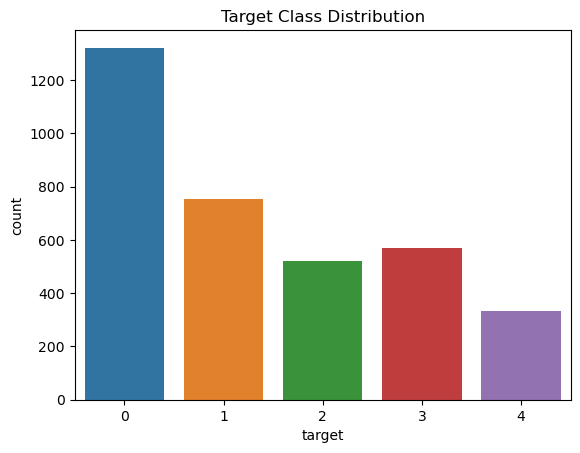

In [9]:
# Inspect target distribution
df['target'].value_counts(normalize=True)
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.show()

### Preprocessing Features

In [10]:
# Encode categorical variables if needed
categorical_cols = ['gender', 'smoking_status', 'alcohol_intake', 'physical_activity', 'family_history']
for col in categorical_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train/Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

### Train a Simple Model

Classification Report:

              precision    recall  f1-score   support

           0       0.38      0.93      0.54       265
           1       0.17      0.04      0.06       150
           2       0.33      0.02      0.04       104
           3       0.20      0.02      0.03       114
           4       0.00      0.00      0.00        67

    accuracy                           0.37       700
   macro avg       0.22      0.20      0.13       700
weighted avg       0.26      0.37      0.23       700

Confusion Matrix:



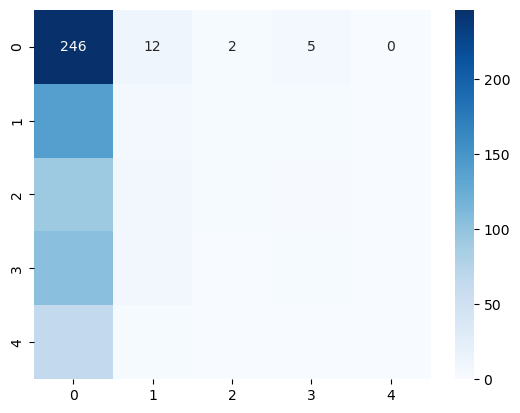

In [12]:
# Random Forest Classifier (works well for tabular data and multi-class)
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.show()

### Feature Importance Visualization

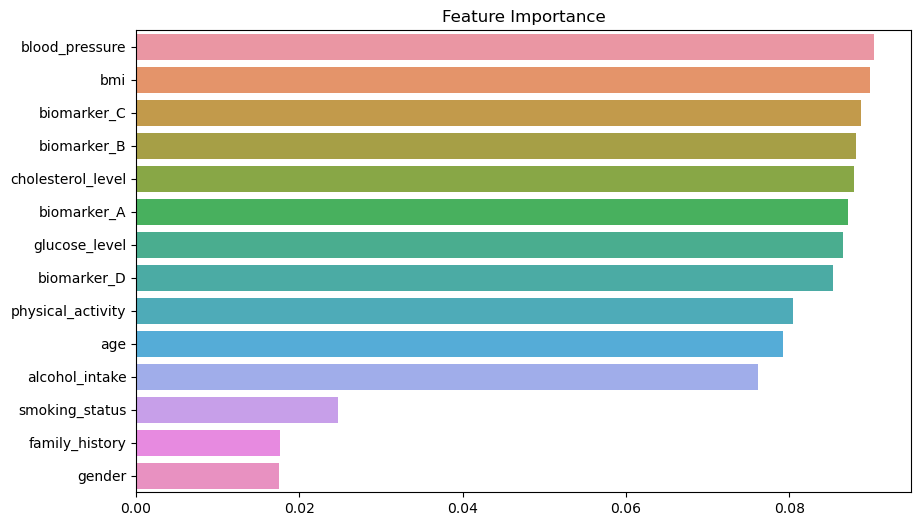

In [13]:
# Feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importance")
plt.show()

### Saving the trained model and scaler

In [14]:
import joblib

# Save the trained Random Forest model
joblib.dump(model, "model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']